
# Project 2: swarming behavior and correlated velocities

In this project you will explore the properties of the [Vicsek swarming model](https://en.wikipedia.org/wiki/Vicsek_model) and you will generalize it by adding rules to the interactions of the active particles in the system.

The model has an internal noise parameter ("$eta$" in the implementation below), and it is known that increasing $eta$ from $0$ to $1$ will lead the swarm to undergo a phase transition, i.e. a qualitative change of behavior, which in this case manifests itself as a passage from collective, ordered motion to random motion for the active particles. 

Referring to the concepts of polarization, correlation function, and correlation length defined in the article [Scale-free correlations in starling flocks](https://www.pnas.org/content/107/26/11865), answer the following questions:


(1) Estimate the value of $eta$ for which there is a phase transition in the Vicsek model, by using the polarization $\Phi$ of the system. Test your method for several values of size $N$ of the system, and several choices of initial random distributions of the active particles.


(2) Estimate the correlation function $C(r)$ of fluctuations of velocities within the Vicsek model, for multiple values of $eta$ and for $N \approx 10^3$. Estimate $\bar r$, the value of $r$ for which $C(r)$ becomes zero ($\bar r$ is an estimate of the correlation length of the swarm). 


(3) Research the literature to find other swarming and flocking models. On the basis of your literature review and your intuition, try to modify the Vicsek model so that you increase the average value of $\bar r$ for the swarm.  

N.B. all your answers should be in reference to the system in an "asymptotic" state when the initial random distribution of the positions and velocities of the active particles is no more significant to the dynamics.



This code template is taken from a blog post of [Francesco Turci](https://francescoturci.net/2020/06/19/minimal-vicsek-model-in-python/), a researcher in disordered systems. This specific Python implementation allows you to simulate far more active particles than it would be possible with a direct, naive implementation of the Vicsek model.

 N 3072


<IPython.core.display.Javascript object>


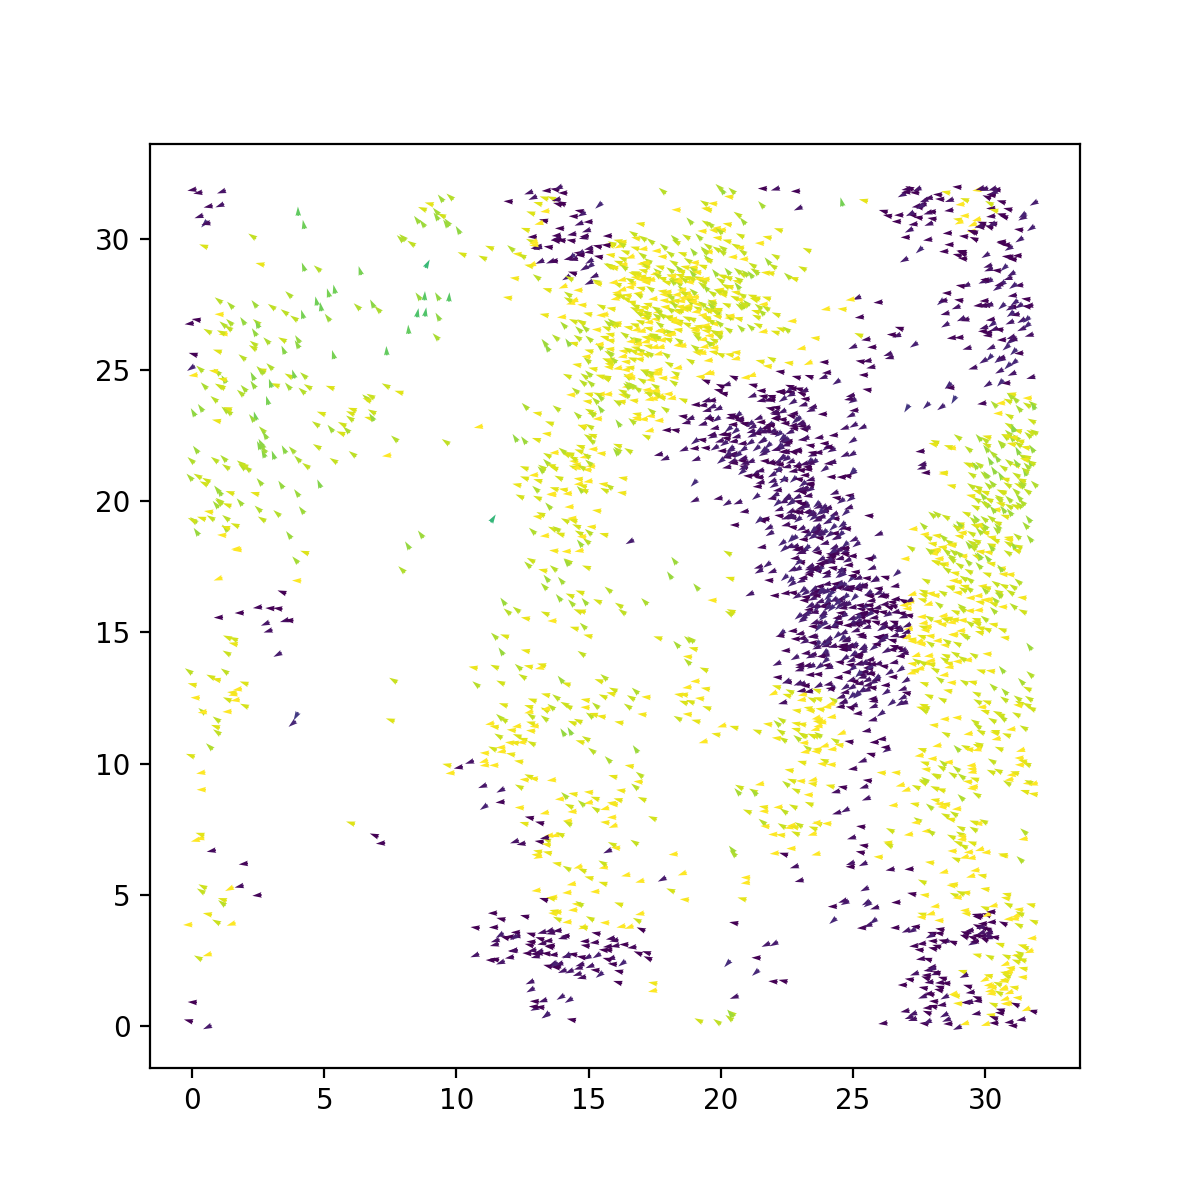

In [2]:
import numpy as np
import scipy as sp
from scipy import sparse
from scipy.spatial import cKDTree
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib notebook

L = 32.0
rho = 3.0
N = int(rho*L**2)
print(" N",N)
 
r0 = 1.0
deltat = 1.0
factor =0.5
v0 = r0/deltat*factor
iterations = 10000
eta = 0.15
 
pos = np.random.uniform(0,L,size=(N,2))
orient = np.random.uniform(-np.pi, np.pi,size=N)
 
fig, ax= plt.subplots(figsize=(6,6))
 
qv = ax.quiver(pos[:,0], pos[:,1], np.cos(orient), np.sin(orient), orient, clim=[-np.pi, np.pi])
 
def animate(i):
    print(i)
    global pos
    global orient
    tree = cKDTree(pos,boxsize=[L,L])
    dist = tree.sparse_distance_matrix(tree, max_distance=r0,output_type='coo_matrix')
 
    #important 3 lines: we evaluate a quantity for every column j
    data = np.exp(orient[dist.col]*1j)
    # construct  a new sparse marix with entries in the same places ij of the dist matrix
    neigh = sparse.coo_matrix((data,(dist.row,dist.col)), shape=dist.get_shape())
    # and sum along the columns (sum over j)
    S = np.squeeze(np.asarray(neigh.tocsr().sum(axis=1)))
     
     
    orient = np.angle(S)+eta*np.random.uniform(-np.pi, np.pi, size=N)
 
 
    cos, sin= np.cos(orient), np.sin(orient)
    pos[:,0] += cos*v0
    pos[:,1] += sin*v0
 
    pos[pos>L] -= L
    pos[pos<0] += L
 
    qv.set_offsets(pos)
    qv.set_UVC(cos, sin,orient)
    
    
    
    
    return qv,
 


anim=FuncAnimation(fig,animate,frames=np.arange(1,2000),interval=20, blit=False, repeat=False)

#if you want to see this animation in Spyder, follow the suggestion in this post: 
#https://stackoverflow.com/questions/35856079/animation-from-matplotlib-not-working-in-spyder

plt.show()